# How Race Affects Policing in Typically Conservative of Liberal States

Rishabh Parekh

Digital Humanities 101

Dr. Evan Muzzall 

UC Berkeley

7/2/20

![Black Lives Matter](./images/dh101pic.jpeg) 

![Liberal Conservative](./images/liberalconservative.jpg)

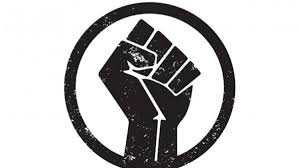

# I. Introduction

Fixing the police systems across the United States is a bipartisan issue. According to an August 2019 study by the National Academy of Sciences, “black men were about 2.5 times more likely than white men to be killed by police, and that black men have a 1-in-1,000 chance of dying at the hands of police.” This statistic is one of thousands that indicate how broken America’s criminal justice system truly is. As a UC Berkeley undergraduate student, I was inspired by the work of the Black Lives Movement and The Bail Project, in addition to the recent revolutionary protests. As an immigrant and a minority myself, I was curious to know whether policing behavior changed towards different races, ethnicities, and ages in different political regions in the United States.

# II. Research Question

The research topic that I chose to investigate is: 

   Are minorities/people of color subject to harsher and more frequent policing stops in major cities, in typically
   conservative states or liberal states?
   

   ## Relevance

To clarify, the terms conservative or liberal are related to their state's political ideologies. This topic is extremely relevant to our daily lives. Currently, there are protests and calls for action across the world, regarding the deaths of George Floyd, Breonna Taylor and countless others who have lost their lives due to unjust policing and racism. Slogans such as #Defundthepolice, have been trending on popular social media platforms like Twitter and Instagram. These social movements have largely been the focus of the media, therefore, with the upcoming Presidential election, it is incredibly vital for the public to have access to the data and stories of policing in their community. 
There has been significant work in highlighting the lapses in criminal justice and policing through data. Efforts from universities such as The Stanford Open Policing Project, organizations such as Police Scorecard, and newspapers such as the Washington Post, routinely publish informative pieces that address whether “there’s overwhelming evidence that the criminal justice system is racist.” These contributions are extremely positive and benefits the collective good by providing continual support to solve police brutality related issues. However, my research project is slightly different, as I am focused on investigating the relationships between policing in politically leaning liberal and conservative regions. The crux of this project is to understand whether there is a strong correlation between policing, regional political ideology, and victim race. 


## Assumptions

One assumption it that the state's political ideology is representative of the political ideology of the major city's police force. The funding of the police is decided by the state government and is therefore influenced by the state's political ideology. Typically, more convervative states tend to spend more on their police force. 

# III. Materials & Methods


I used multiple datasets from the Stanford Open Policing Project (https://openpolicing.stanford.edu/data/). This website provides the authentic and unprocessed datasets for crime in cities across the United States. The 4 cities that I have chosen for this project are located in states with varying political ideologies. The cities are San Francisco, Pittsburgh, Charlotte, and New Orleans. These locations were chosen because the information provided was the most complete compared to other cities listed on the website. Data contained in these csv files include the crime’s reason for the stop, its location, time, latitude, and longitude data. In addition to this, entries are also added if a citation/warning/search/arrests were made as well as the formal outcome of the reported crime (ie. if the crime ended in a citation or a warning). The subjects’ race, age, and sex are also included within the sets, which are also interesting variables to analyze across these cities for their social and political implications.
	I built visualizations mapping crimes in these various cities, locations, types of crime bar charts, victim race type pie charts, Twitter sentiment analysis of recent #policebrutality and #BLM activities on Jupyter, Visual Studio Code, and Twitter Developer API’s. The data is cleaned and available on CSV formats on the  Stanford Open Policing Project website. In addition, I will refer to the README https://github.com/stanford-policylab/opp/blob/master/data_readme.md to understand column name meanings and extra nomenclature.  


# IV. Results

In [21]:
# Read the CSV files and create the Dataframe

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import random 
import os
import re 
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix

## Exploratory Data Analysis

Police Data for San Francisco, California

In [22]:
sfcrime = pd.read_csv('data/ca_san_francisco_2020_04_01.csv')
sfcrime

,raw_row_number,date,time,location,lat,lng,district,subject_age,subject_race,subject_sex,...,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_vehicle,search_basis,reason_for_stop,raw_search_vehicle_description,raw_result_of_contact_description
0,869921,2014-08-01,00:01:00,MASONIC AV & FELL ST,37.773004,-122.445873,NaN,NaN,asian/pacific islander,female,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
1,869922,2014-08-01,00:01:00,GEARY&10TH AV,37.780898,-122.468586,NaN,NaN,black,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
2,869923,2014-08-01,00:15:00,SUTTER N OCTAVIA ST,37.786919,-122.426718,NaN,NaN,hispanic,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
3,869924,2014-08-01,00:18:00,3RD ST & DAVIDSON,37.746380,-122.392005,NaN,NaN,hispanic,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning
4,869925,2014-08-01,00:19:00,DIVISADERO ST. & BUSH ST.,37.786348,-122.440003,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Citation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
905065,893005,2014-10-31,23:47:00,ORTEGA ST & 38TH AVE,37.751482,-122.496725,NaN,NaN,white,male,...,False,True,warning,NaN,False,False,NaN,Moving Violation,No Search,Warning
905066,893006,2014-10-31,23:48:00,DUBOCE/BELCHER,37.769388,-122.430272,NaN,NaN,asian/pacific islander,male,...,True,False,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation
905067,893007,2014-10-31,23:49:00,NEW MONTGOMERY & STEVENSON,37.788297,-122.401527,NaN,NaN,white,male,...,True,False,citation,NaN,False,False,NaN,Moving Violation,No Search,Citation
905068,893008,2014-10-31,23:50:00,BURKE & 3RD,37.745006,-122.387067,NaN,NaN,black,male,...,False,True,warning,NaN,False,False,NaN,Mechanical or Non-Moving Violation (V.C.),No Search,Warning


Police Data for Charlotte, North Carolina

In [23]:
cltcrime = pd.read_csv('data/nc_charlotte_2020_04_01.csv')
cltcrime

,raw_row_number,date,time,location,county_name,subject_age,subject_race,subject_sex,officer_id_hash,department_name,...,search_conducted,search_person,search_vehicle,search_basis,reason_for_frisk,reason_for_search,reason_for_stop,raw_Ethnicity,raw_Race,raw_action_description
0,3254,2000-01-01,17:20:00,Unknown,NaN,38.0,black,female,22e35044ed,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Safe Movement Violation,N,B,Verbal Warning
1,3259,2000-01-02,11:40:00,Unknown,NaN,33.0,hispanic,male,22e35044ed,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Vehicle Regulatory Violation,H,W,Citation Issued
2,3281,2000-01-02,02:41:00,Unknown,NaN,23.0,white,male,22e35044ed,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Vehicle Equipment Violation,N,W,Citation Issued
3,3282,2000-01-23,03:35:00,Unknown,NaN,23.0,white,female,22e35044ed,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Vehicle Regulatory Violation,N,W,Citation Issued
4,3283,2000-01-02,16:45:00,Unknown,NaN,23.0,white,female,22e35044ed,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Safe Movement Violation,N,W,Verbal Warning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1598448,20196581,2015-10-29,09:12:00,"nan, Mecklenburg County",Mecklenburg County,23.0,white,male,b4e80820ef,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Stop Light/Sign Violation,N,W,Citation Issued
1598449,20196582,2015-10-29,09:35:00,"nan, Mecklenburg County",Mecklenburg County,22.0,white,male,b4e80820ef,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Stop Light/Sign Violation,N,W,Citation Issued
1598450,20196583,2015-10-29,10:30:00,"nan, Mecklenburg County",Mecklenburg County,23.0,black,male,098aa2cef7,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Stop Light/Sign Violation,N,B,Citation Issued
1598451,20196584,2015-10-29,09:25:00,"nan, Mecklenburg County",Mecklenburg County,59.0,white,female,e6652f3f3d,UNC Charlotte University Police Department,...,False,False,False,NaN,NaN,NaN,Vehicle Regulatory Violation,N,W,Written Warning


Police Crime Data from New Orleans, Louisiana

In [24]:
nolacrime = pd.read_csv('data/la_new_orleans_2020_04_01.csv')
nolacrime

,raw_row_number,date,time,location,lat,lng,district,zone,subject_age,subject_race,...,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_color,vehicle_make,vehicle_model,vehicle_year,raw_actions_taken,raw_subject_race
0,1,2010-01-01,01:11:00,NaN,NaN,NaN,6,E,26.0,black,...,False,False,NaN,TRAFFIC VIOLATION,BLACK,DODGE,CARAVAN,2005.0,NaN,BLACK
1,9087,2010-01-01,01:29:00,NaN,NaN,NaN,7,C,37.0,black,...,False,False,NaN,TRAFFIC VIOLATION,BLUE,NISSAN,MURANO,2005.0,NaN,BLACK
2,9086,2010-01-01,01:29:00,NaN,NaN,NaN,7,C,37.0,black,...,False,False,NaN,TRAFFIC VIOLATION,BLUE,NISSAN,MURANO,2005.0,NaN,BLACK
3,267,2010-01-01,14:00:00,NaN,NaN,NaN,7,I,96.0,black,...,False,False,NaN,TRAFFIC VIOLATION,GRAY,JEEP,GRAND CHEROKEE,2003.0,NaN,BLACK
4,2,2010-01-01,02:06:00,NaN,NaN,NaN,5,D,17.0,black,...,False,False,NaN,CALL FOR SERVICE,NaN,NaN,NaN,NaN,NaN,BLACK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512087,481268,2017-12-31,00:48:00,Gravier St & Tchoupitoulas St,29.950014,-90.06656,8,G,28.0,black,...,True,True,other,TRAFFIC VIOLATION,BLACK,KIA (4-WHEEL AUTOMOBILE),OTHER,2006.0,Stop Results: Physical Arrest;Subject Type: Pa...,BLACK
512088,481266,2017-12-31,00:48:00,Gravier St & Tchoupitoulas St,29.950014,-90.06656,8,G,25.0,black,...,True,True,other,TRAFFIC VIOLATION,BLACK,KIA (4-WHEEL AUTOMOBILE),OTHER,2006.0,Stop Results: Physical Arrest;Subject Type: Pa...,BLACK
512089,481269,2017-12-31,00:48:00,Gravier St & Tchoupitoulas St,29.950014,-90.06656,8,G,23.0,black,...,True,True,other,TRAFFIC VIOLATION,BLACK,KIA (4-WHEEL AUTOMOBILE),OTHER,2006.0,Stop Results: Physical Arrest;Subject Type: Pa...,BLACK
512090,481270,2017-12-31,00:48:00,Gravier St & Tchoupitoulas St,29.950014,-90.06656,8,G,25.0,black,...,True,True,other,TRAFFIC VIOLATION,BLACK,KIA (4-WHEEL AUTOMOBILE),OTHER,2006.0,Stop Results: Physical Arrest;Subject Type: Pa...,BLACK


Police Crime Data from Pittsburgh, Pennsylvania

In [25]:
pittcrime = pd.read_csv('data/pa_pittsburgh_2020_04_01.csv')
pittcrime

,raw_row_number,date,time,location,lat,lng,neighborhood,subject_age,subject_race,subject_sex,...,raw_object_searched,raw_race,raw_ethnicity,raw_zone_division,raw_evidence_found,raw_weapons_found,raw_nothing_found,raw_police_zone,raw_officer_race,raw_officer_zone
0,1,2008-01-01,00:14:00,351 S Negley Ave,40.459466,-79.932802,NaN,20.0,white,male,...,NaN,White,White,-,NaN,NaN,NaN,NaN,NaN,NaN
1,3,2008-01-01,00:14:00,376 Main St,40.465868,-79.955594,NaN,19.0,white,male,...,NaN,White,White,-,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2008-01-01,00:14:00,Stamair Way & Baum Blvd,40.456812,-79.939041,NaN,16.0,white,male,...,NaN,White,White,-,NaN,NaN,NaN,NaN,NaN,NaN
3,4,2008-01-01,01:59:00,N Braddock Ave & Thomas Blvd,40.448873,-79.893923,NaN,21.0,NaN,male,...,person,Black,White,-,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2008-01-01,14:50:00,2518 West Liberty Ave,40.398780,-80.026439,NaN,41.0,white,male,...,person vehicle place,White,NaN,N/V,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274553,55770,NaN,NaN,439 Rosedale St,40.448970,-79.887709,NaN,16.0,NaN,male,...,person,Black,White,-,NaN,NaN,NaN,NaN,NaN,NaN
274554,55768,NaN,NaN,601 Brushton Ave,40.452854,-79.889239,NaN,19.0,NaN,male,...,person,Black,White,-,NaN,NaN,NaN,NaN,NaN,NaN
274555,55767,NaN,NaN,Rosedale St & Madiera St,40.448457,-79.887734,NaN,21.0,NaN,male,...,person vehicle,Black,White,-,NaN,NaN,NaN,NaN,NaN,NaN
274556,55771,NaN,NaN,Rosedale St & Madiera St,40.448457,-79.887734,NaN,19.0,NaN,male,...,person,Black,White,-,NaN,NaN,NaN,NaN,NaN,NaN


Here, I begin to compile the datasets and create a dataframe which includes common variables in all the city data such as data, time, age, race, sex, type, outcome, citation issued, state political ideology and reason for stop. 

In [26]:
sf_crime_to_merge = sfcrime[["date", "time", "subject_age", "subject_race", "subject_sex", "type", "outcome", "citation_issued", "reason_for_stop"]]
sf_crime_to_merge = pd.DataFrame(sf_crime_to_merge)
sf_crime_to_merge["city"] = "San Francisco"
sf_crime_to_merge['state_political_ideology'] = 'Liberal'
sf_crime_to_merge


,date,time,subject_age,subject_race,subject_sex,type,outcome,citation_issued,reason_for_stop,city,state_political_ideology
0,2014-08-01,00:01:00,NaN,asian/pacific islander,female,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
1,2014-08-01,00:01:00,NaN,black,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
2,2014-08-01,00:15:00,NaN,hispanic,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
3,2014-08-01,00:18:00,NaN,hispanic,male,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
4,2014-08-01,00:19:00,NaN,white,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
...,...,...,...,...,...,...,...,...,...,...,...
905065,2014-10-31,23:47:00,NaN,white,male,vehicular,warning,False,Moving Violation,San Francisco,Liberal
905066,2014-10-31,23:48:00,NaN,asian/pacific islander,male,vehicular,citation,True,Moving Violation,San Francisco,Liberal
905067,2014-10-31,23:49:00,NaN,white,male,vehicular,citation,True,Moving Violation,San Francisco,Liberal
905068,2014-10-31,23:50:00,NaN,black,male,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal


In [27]:
clt_crime_to_merge = cltcrime[["date", "time", "subject_age", "subject_race", "subject_sex", "type", "outcome", "citation_issued", "reason_for_stop"]]
clt_crime_to_merge = pd.DataFrame(clt_crime_to_merge)
clt_crime_to_merge["city"] = "Charlotte"
clt_crime_to_merge["state_political_ideology"] = "Conservative"
clt_crime_to_merge

,date,time,subject_age,subject_race,subject_sex,type,outcome,citation_issued,reason_for_stop,city,state_political_ideology
0,2000-01-01,17:20:00,38.0,black,female,vehicular,warning,False,Safe Movement Violation,Charlotte,Conservative
1,2000-01-02,11:40:00,33.0,hispanic,male,vehicular,citation,True,Vehicle Regulatory Violation,Charlotte,Conservative
2,2000-01-02,02:41:00,23.0,white,male,vehicular,citation,True,Vehicle Equipment Violation,Charlotte,Conservative
3,2000-01-23,03:35:00,23.0,white,female,vehicular,citation,True,Vehicle Regulatory Violation,Charlotte,Conservative
4,2000-01-02,16:45:00,23.0,white,female,vehicular,warning,False,Safe Movement Violation,Charlotte,Conservative
...,...,...,...,...,...,...,...,...,...,...,...
1598448,2015-10-29,09:12:00,23.0,white,male,vehicular,citation,True,Stop Light/Sign Violation,Charlotte,Conservative
1598449,2015-10-29,09:35:00,22.0,white,male,vehicular,citation,True,Stop Light/Sign Violation,Charlotte,Conservative
1598450,2015-10-29,10:30:00,23.0,black,male,vehicular,citation,True,Stop Light/Sign Violation,Charlotte,Conservative
1598451,2015-10-29,09:25:00,59.0,white,female,vehicular,warning,False,Vehicle Regulatory Violation,Charlotte,Conservative


In [28]:
nola_crime_to_merge = nolacrime[["date", "time", "subject_age", "subject_race", "subject_sex", "type", "outcome", "citation_issued", "reason_for_stop"]]
nola_crime_to_merge = pd.DataFrame(nola_crime_to_merge)
nola_crime_to_merge["city"] = "New Orleans"
nola_crime_to_merge['state_political_ideology'] = 'Conservative'
nola_crime_to_merge

,date,time,subject_age,subject_race,subject_sex,type,outcome,citation_issued,reason_for_stop,city,state_political_ideology
0,2010-01-01,01:11:00,26.0,black,female,vehicular,NaN,False,TRAFFIC VIOLATION,New Orleans,Conservative
1,2010-01-01,01:29:00,37.0,black,male,vehicular,NaN,False,TRAFFIC VIOLATION,New Orleans,Conservative
2,2010-01-01,01:29:00,37.0,black,male,vehicular,NaN,False,TRAFFIC VIOLATION,New Orleans,Conservative
3,2010-01-01,14:00:00,96.0,black,male,vehicular,NaN,False,TRAFFIC VIOLATION,New Orleans,Conservative
4,2010-01-01,02:06:00,17.0,black,male,NaN,NaN,False,CALL FOR SERVICE,New Orleans,Conservative
...,...,...,...,...,...,...,...,...,...,...,...
512087,2017-12-31,00:48:00,28.0,black,female,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative
512088,2017-12-31,00:48:00,25.0,black,male,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative
512089,2017-12-31,00:48:00,23.0,black,male,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative
512090,2017-12-31,00:48:00,25.0,black,male,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative


In [29]:
pitt_crime_to_merge = pittcrime[["date", "time", "subject_age", "subject_race", "subject_sex", "type", "outcome", "citation_issued", "reason_for_stop"]]
pitt_crime_to_merge = pd.DataFrame(pitt_crime_to_merge)
pitt_crime_to_merge["city"] = "Pittsburg"
pitt_crime_to_merge['state_political_ideology'] = 'Liberal'
pitt_crime_to_merge

,date,time,subject_age,subject_race,subject_sex,type,outcome,citation_issued,reason_for_stop,city,state_political_ideology
0,2008-01-01,00:14:00,20.0,white,male,pedestrian,NaN,False,Other,Pittsburg,Liberal
1,2008-01-01,00:14:00,19.0,white,male,pedestrian,NaN,False,Other,Pittsburg,Liberal
2,2008-01-01,00:14:00,16.0,white,male,pedestrian,NaN,False,Other,Pittsburg,Liberal
3,2008-01-01,01:59:00,21.0,NaN,male,pedestrian,arrest,False,majorCrimes Other,Pittsburg,Liberal
4,2008-01-01,14:50:00,41.0,white,male,pedestrian,NaN,False,narcVice,Pittsburg,Liberal
...,...,...,...,...,...,...,...,...,...,...,...
274553,NaN,NaN,16.0,NaN,male,pedestrian,NaN,False,majorCrimes,Pittsburg,Liberal
274554,NaN,NaN,19.0,NaN,male,pedestrian,NaN,False,majorCrimes,Pittsburg,Liberal
274555,NaN,NaN,21.0,NaN,male,pedestrian,NaN,False,majorCrimes,Pittsburg,Liberal
274556,NaN,NaN,19.0,NaN,male,pedestrian,NaN,False,majorCrimes,Pittsburg,Liberal


In [30]:
crime_merged = sf_crime_to_merge.append(clt_crime_to_merge)
crime_merged = crime_merged.append(pitt_crime_to_merge)
crime_merged = crime_merged.append(nola_crime_to_merge)
crime_merged

,date,time,subject_age,subject_race,subject_sex,type,outcome,citation_issued,reason_for_stop,city,state_political_ideology
0,2014-08-01,00:01:00,NaN,asian/pacific islander,female,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
1,2014-08-01,00:01:00,NaN,black,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
2,2014-08-01,00:15:00,NaN,hispanic,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
3,2014-08-01,00:18:00,NaN,hispanic,male,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
4,2014-08-01,00:19:00,NaN,white,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal
...,...,...,...,...,...,...,...,...,...,...,...
512087,2017-12-31,00:48:00,28.0,black,female,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative
512088,2017-12-31,00:48:00,25.0,black,male,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative
512089,2017-12-31,00:48:00,23.0,black,male,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative
512090,2017-12-31,00:48:00,25.0,black,male,vehicular,arrest,False,TRAFFIC VIOLATION,New Orleans,Conservative


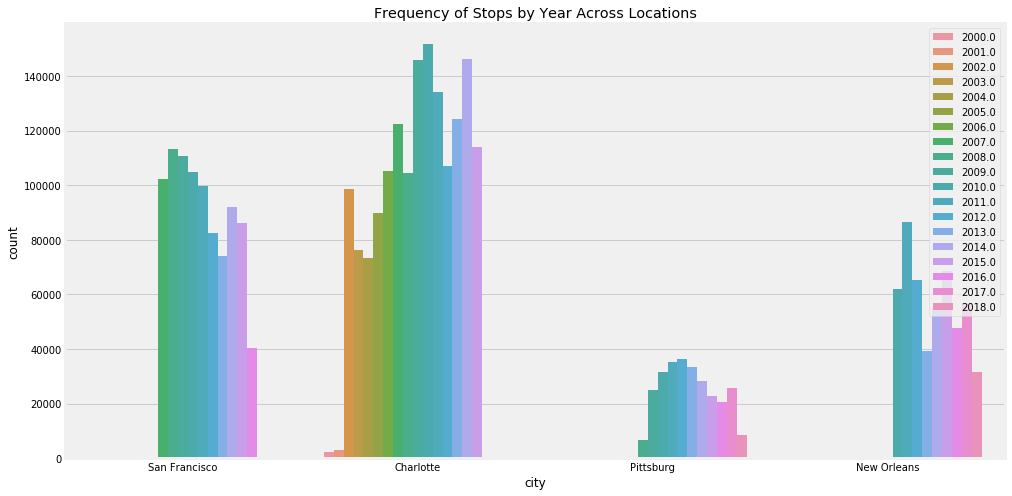

In [11]:
crime_time = crime_merged.copy()
crime_time['date'] = pd.to_datetime(crime_time['date'])
crime_time['year'] = crime_time['date'].dt.year
crime_grouped = crime_time.groupby(['city','year']).count()[['citation_issued']].reset_index()

plt.figure(figsize=(15,8))
sns.countplot(x='city', hue='year', data=crime_time)
plt.title('Frequency of Stops by Year Across Locations')
plt.legend(loc = 'best')
plt.show()

The graph above displays the Frequency of Stops by Year across the four selected cities. The X axis displays the 'city' and the Y axis displays the 'count.'

It is important to note that data for every year from 2000 to 2018 was not avaliable for all cities. For example, Charlotte seems to have the data for a majority of the years noted in the key. On the contrary, Pittsburgh does not have data for a majority of the years.  

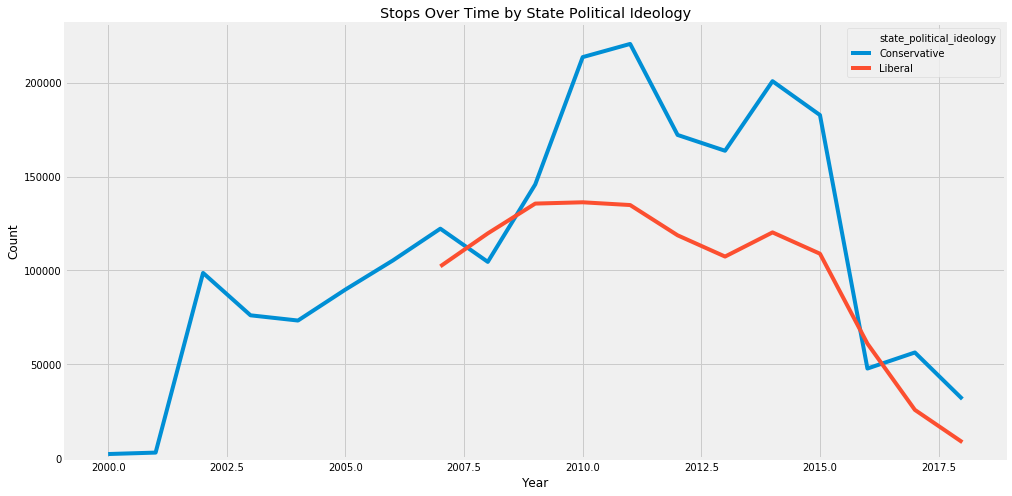

In [12]:
crime_time_year_ideology_df_columns = ['state_political_ideology','year','citation_issued']
crime_time_year_ideology_df = crime_time.loc[:, crime_time_year_ideology_df_columns]
crime_time_year_ideology_df.groupby('citation_issued').filter(lambda x: any(x['citation_issued'] == True))
crime_time_year_ideology_df = crime_time_year_ideology_df.groupby(["year","state_political_ideology"]).count()
crime_time_year_ideology_df=crime_time_year_ideology_df.reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(x='year', y = 'citation_issued', hue="state_political_ideology", data=crime_time_year_ideology_df)
plt.ylim(ymin=0)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Stops Over Time by State Political Ideology")
plt.legend()
plt.show()

There are interesting trends in this graph above. Clearly, conservative states have a higher count. Where there is overlap, conservative states have more stops compared to liberal states. 

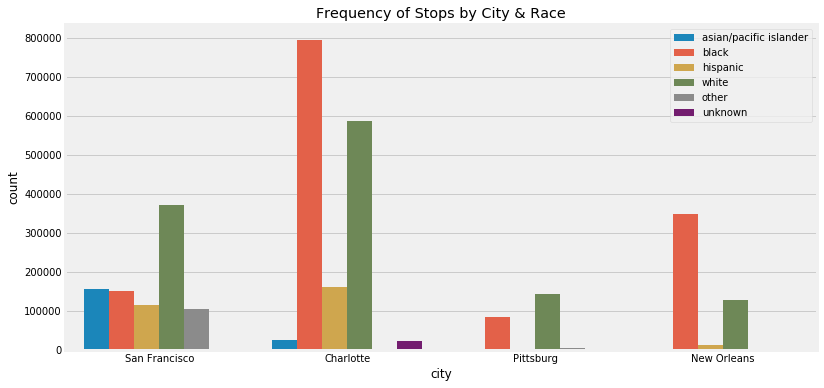

In [13]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="city", hue="subject_race", data=crime_time)
plt.title('Frequency of Stops by City & Race')
plt.legend(loc = 'upper right')
plt.show()

The graph above demonstrates the frequency of stops in a city by race.  

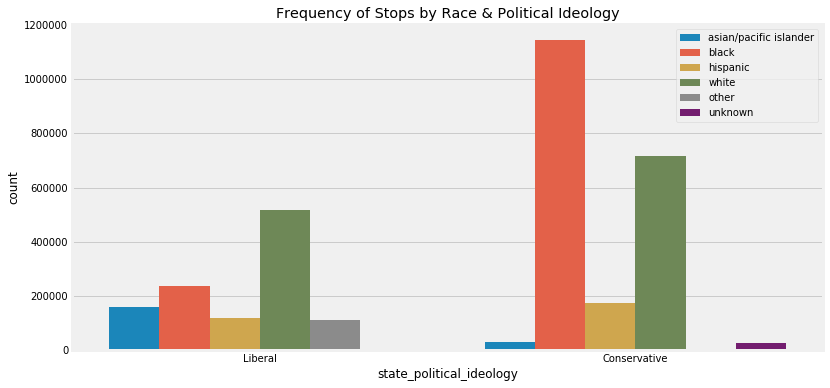

In [14]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="state_political_ideology", hue="subject_race", data=crime_time)
plt.title('Frequency of Stops by Race & Political Ideology')
plt.legend(loc = 'upper right')
plt.show()

The graph above demostrates the frequency of stops by race and political ideology.

In order to maintain consistency in the data, I trimmed down the years of focus by using only the stops from 2010 to 2015. 

In [15]:
#taking only the stops from 2010-2015 
inclusive_years = [2010, 2011, 2012, 2013, 2014, 2015]
crime_2010_2015 = crime_time[crime_time['year'].isin(inclusive_years)]
crime_2010_2015.head()

,date,time,subject_age,subject_race,subject_sex,type,outcome,citation_issued,reason_for_stop,city,state_political_ideology,year
0,2014-08-01,00:01:00,NaN,asian/pacific islander,female,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal,2014.0
1,2014-08-01,00:01:00,NaN,black,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal,2014.0
2,2014-08-01,00:15:00,NaN,hispanic,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal,2014.0
3,2014-08-01,00:18:00,NaN,hispanic,male,vehicular,warning,False,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal,2014.0
4,2014-08-01,00:19:00,NaN,white,male,vehicular,citation,True,Mechanical or Non-Moving Violation (V.C.),San Francisco,Liberal,2014.0


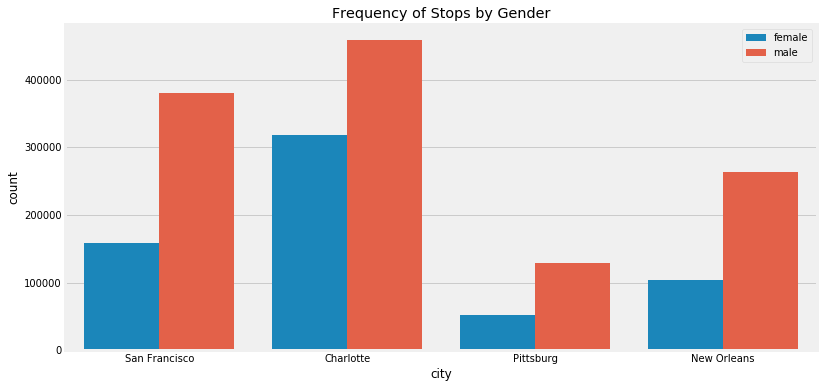

In [16]:
plt.figure(figsize=(12,6))
ax = sns.countplot(x="city", hue="subject_sex", data=crime_2010_2015)
plt.title('Frequency of Stops by Gender')
plt.legend(loc = 'upper right')
plt.show()

The graph above depicts the frequency of stops by gender from the years 2010 to 2015. In each of the four target cities, males were over twice as likely to get stopped compared to females. 

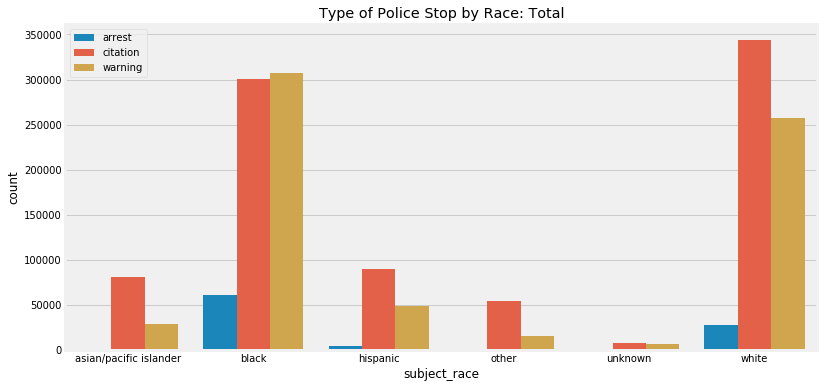

In [17]:
crime_2010_2015['year'] = pd.DatetimeIndex(crime_2010_2015["date"]).year
plt.figure(figsize=(12,6))
ax = sns.countplot(x="subject_race", hue="outcome", data=crime_2010_2015.sort_values(by=['outcome', 'subject_race']))
plt.title('Type of Police Stop by Race: Total')
plt.legend(loc = 'upper left')
plt.show()

The graph above depicts the types of police stop by race. Again, relative to the US population, minorities are much more likely to recieve arrests, citations, and even warnings compared to white individuals. 

In [18]:
mft_columns = ['state_political_ideology','subject_race','subject_sex','citation_issued']
crime_2010_2015_citation = crime_2010_2015.loc[:, mft_columns]
crime_2010_2015_citation.groupby('citation_issued').filter(lambda x: any(x['citation_issued'] == True))
cdf = crime_2010_2015_citation.groupby(['state_political_ideology','subject_race','subject_sex']).count()
cdf

citation_issued
state_political_ideology subject_race           subject_sex                 
Conservative             asian/pacific islander female                  5806
                                                male                   10310
                         black                  female                247110
                                                male                  412532
                         hispanic               female                 24269
                                                male                   58640
                         other                  female                   197
                                                male                     447
                         unknown                female                  3628
                                                male                   10394
                         white                  female                140300
                                                male                  229940
Liberal                  asian/pacific islander female                 29734
                                                male                   67255
                         black                  female                 43305
                                                male                  102835
                         hispanic               female                 17059
                                                male                   55391
                         other                  female                 14757
                                                male                   56729
                         unknown                female                   867
                                                male                    1571
                         white                  female                104499
                                                male                  211502

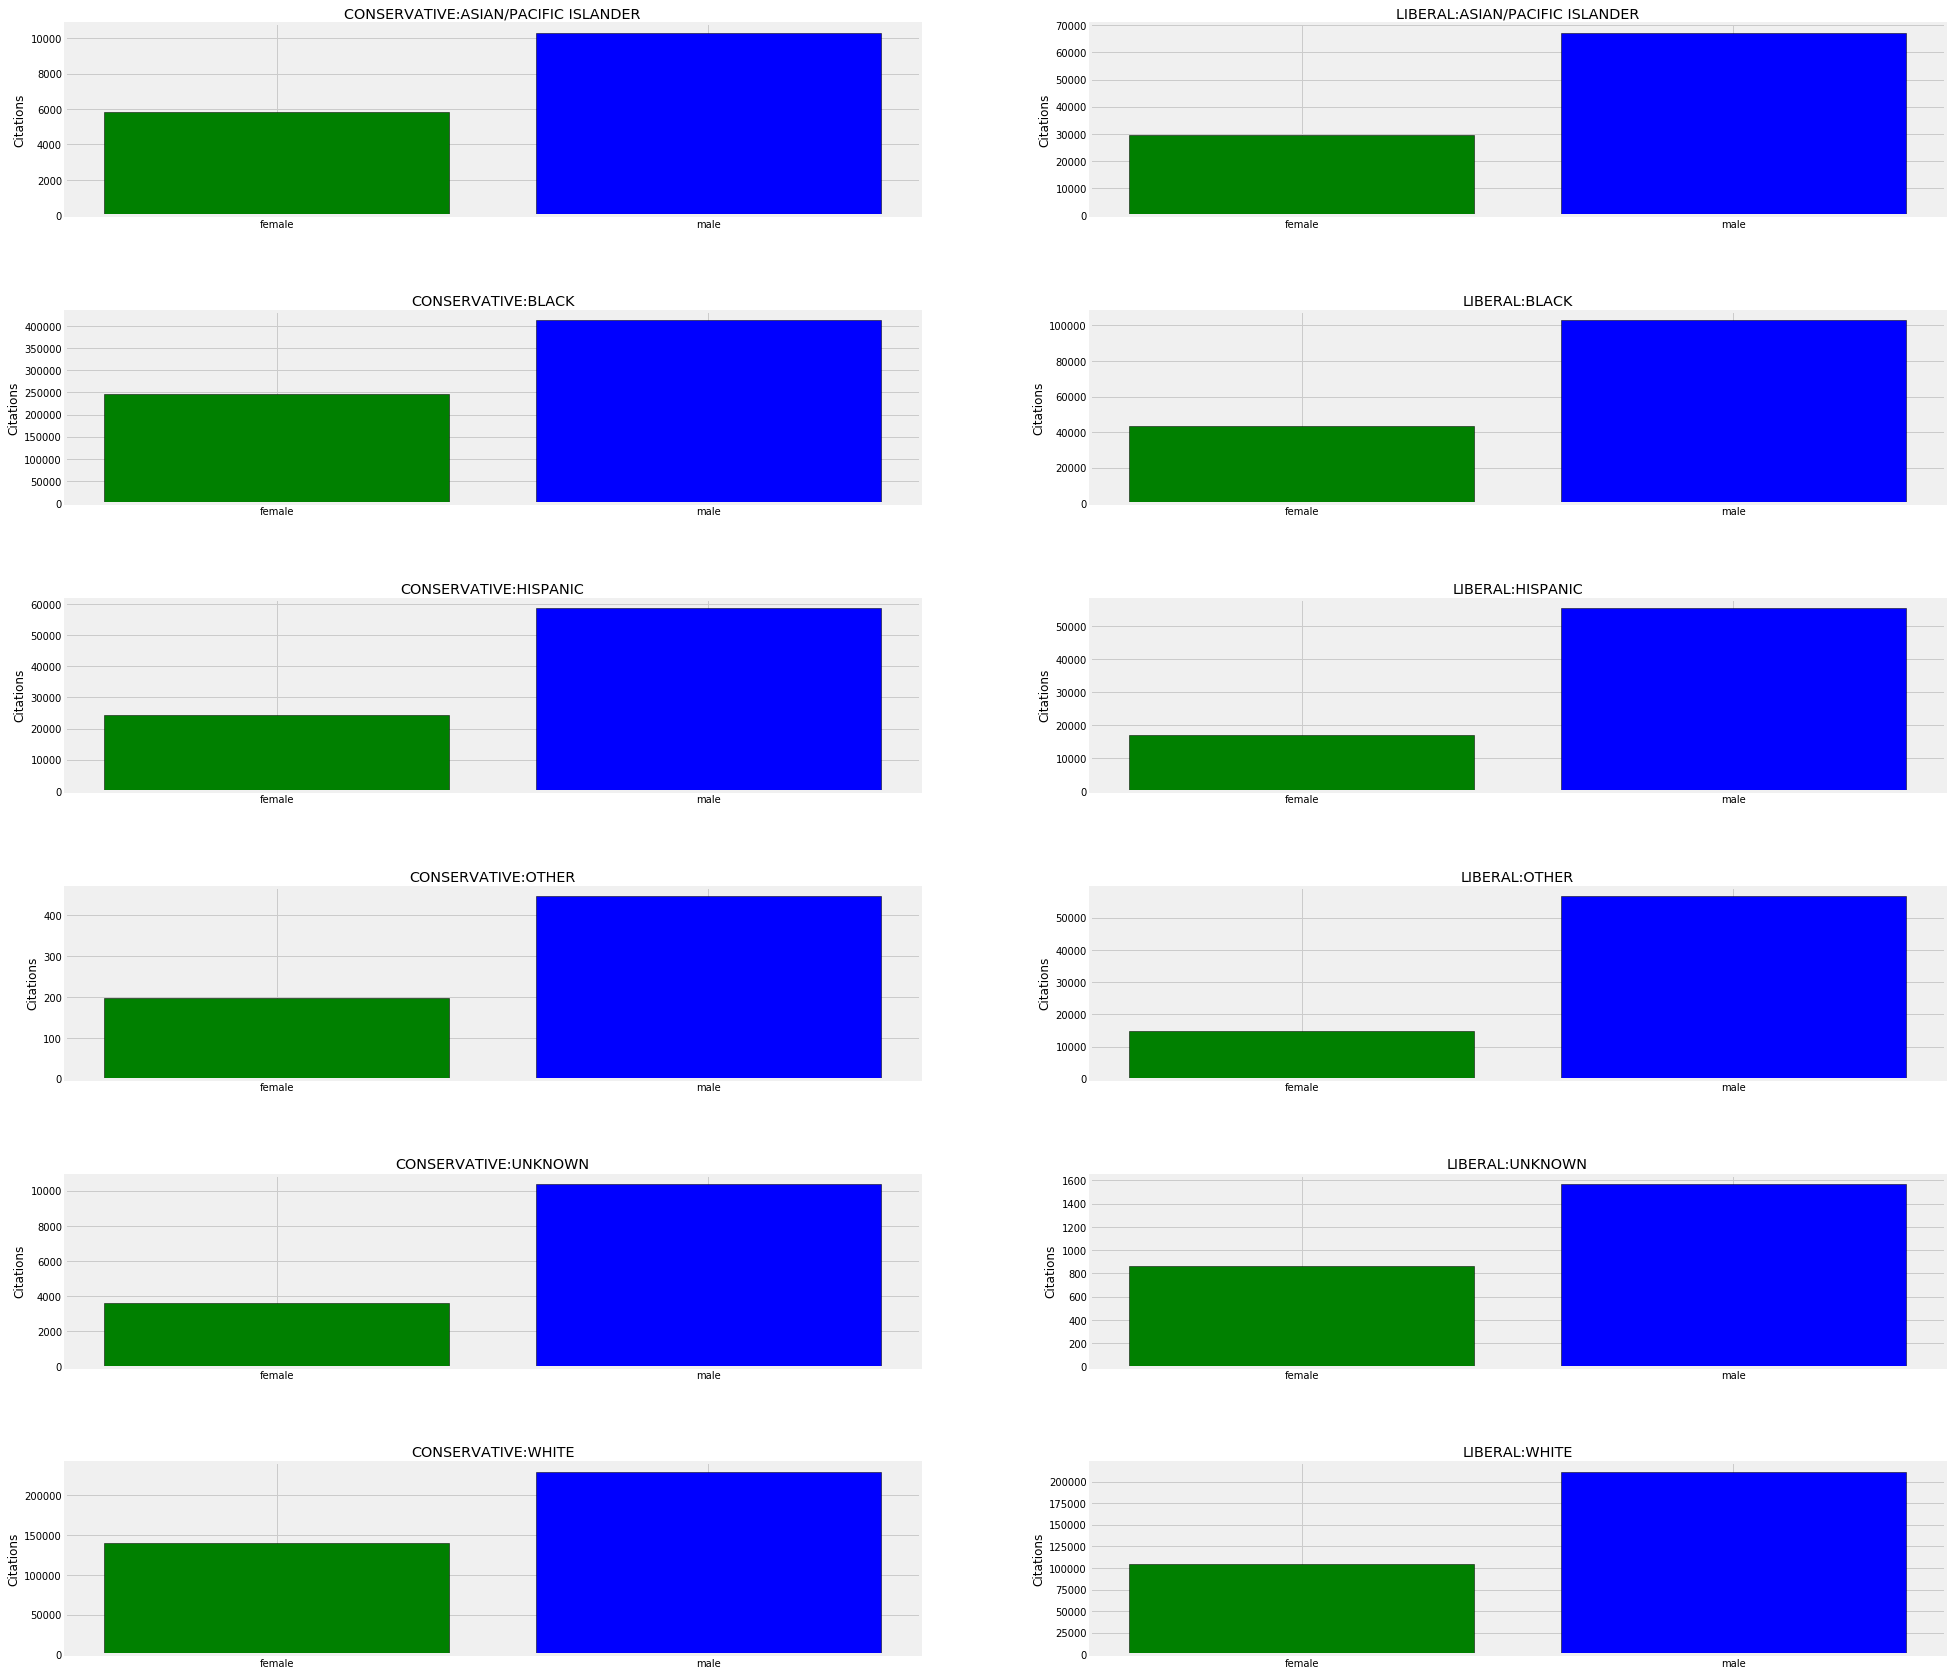

In [19]:
from numpy.random import randint
from numpy.random import randint
import matplotlib.pyplot as plt
import numpy as np
columns = len(crime_2010_2015_citation['state_political_ideology'].unique())
rows = len(crime_2010_2015_citation['subject_race'].unique())
fig, axs = plt.subplots(rows-1, columns, figsize = (30,30))
y_index = 0
for race, grp_race in cdf.groupby(['subject_race']):
    x_index = 0
    race_label = grp_race.index[0][1]
    for ideology_name, grp_ideology_name in grp_race.groupby(['state_political_ideology']):
        ideology_label = grp_ideology_name.index[0][0]
        axs[y_index, x_index].bar(grp_ideology_name.reset_index()['subject_sex'], grp_ideology_name.reset_index()['citation_issued'],label=str.upper(race_label)+":"+str.upper(ideology_label),color=['green', 'blue', 'cyan'],edgecolor='black')
        axs[y_index, x_index].set_ylabel('Citations')
        axs[y_index, x_index].set_title(str.upper(ideology_label)+":"+str.upper(race_label))
        x_index += 1
    y_index += 1
ax.legend()
plt.subplots_adjust(hspace=0.5)
plt.show()

Lastly, this graph depicts the number of citations issued by gender, in conservative or liberal leaning states. It is important to note that the scale of citations on the Y axis are different in each graph. 

# V. Discussion

Through this project, I hope to challenge myself as a digital humanities researcher and python programmer. I hope that the findings and visualizations from my project enables viewers to easily digest the complicated relationships of policing data, subject age, subject race, location, time of stop, and punishment. Eventually, I hope this project serves as the genesis for my end goal of developing data science tools that democratize the access to data and the public. I am committed to expanding/broadening my initial project to make more projects at the intersection of data science and public policy - intended for public good. 

In the future, I hope to take this project further by adding a sentiment analysis based on tweets from the chosen cities. 

# Sources: 

- https://www.washingtonpost.com/graphics/2020/opinions/systemic-racism-police-evidence-criminal-justice-system/
- https://openpolicing.stanford.edu/
- https://www.pnas.org/content/116/32/15877
- https://www.prisonpolicy.org/scans/police_mort_open.pdf